In [1]:
# Import statements
import os
import random

import gym
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt

from tqdm import tqdm, trange

from collections import defaultdict

import seaborn as sns

from time import sleep
from IPython.display import clear_output, display

env = gym.make('FrozenLake8x8-v0')

# parameters 
#episodes = 10000
#gamma = 1.0
#alpha = 0.1
#epsilon = 1.0
epsilon_decay = 0.999 # decay per episode
eligibility_decay = 0.3

n_states = env.observation_space.n
n_actions = env.action_space.n

In [2]:
# Parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (9, 6),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'
         }

plt.rcParams.update(params)

# Global Parameters
RANDOM_STATE = 24

alpha = 0.4 #0.85
gamma = 0.95
epsilon = 0.8
lambd = 0.9

In [3]:
from IPython.display import clear_output, display
from time import sleep

def fn_display(opt_policy):
    '''
    Function to visualise how agent behaves under given policy
    Args:
        opt_policy: one hot encoded policy, numpy array of shape (64,4)
    '''
    points = 0
    for i_episode in range(5): # run 10 episodes
        observation = env.reset()
        while True: # run until episode is done
            clear_output(wait=True)
            print ('Episode number:{} Score {}'.format(i_episode, points))
            env.render()
            sleep(0.1)
            action = np.argmax(opt_policy[observation])
            observation, reward, done, info = env.step(action)
            points += reward
            if done:
                break
                break

In [21]:
def td(env,n_episodes):
    
    # First, we initialize the empty value table as a dictionary for storing the values of each state
    V = defaultdict(float)
    N = defaultdict(int)
    
    
    for ep in range(n_episodes):
        states = []
        actions = []
        rewards = []
        state = env.reset()
        E = np.zeros(n_states)
        
        while True:
            
            states.append(state)
            
            action  = np.random.choice([0,1,2,3]) # take random action
            
            E = lambd * gamma * E
            E[state] += 1
            
            actions.append(action)
            new_state, reward, done, info = env.step(action)
            
            delta = reward + gamma * V[new_state] - V[state]
            V[state] += alpha * delta* E[state]
            state = new_state
            
            if done:
                break
    return V    

In [22]:
value = td(env, n_episodes=50000)

In [23]:
value

defaultdict(float,
            {1: 0.0005503430520550328,
             0: 0.0003027168706769069,
             2: 0.00069377684974426,
             10: 0.0008572823597161096,
             18: 0.00011475913975976147,
             3: 0.001645799206326792,
             9: 0.000400515912996186,
             17: 0.00023610751441083944,
             16: 0.00016728190846769766,
             8: 0.00033846578463605646,
             24: 6.16021592113077e-05,
             25: 0.00021863748577133536,
             26: 0.00023978267024353425,
             33: 1.8526623548467812e-05,
             32: 5.34808912017733e-06,
             27: 5.109999847115348e-05,
             34: 4.56922840383446e-06,
             42: 0.0,
             41: 0.0,
             11: 0.0014382894954174628,
             19: 0.0,
             12: 0.002792242932512667,
             4: 0.0043887279080198,
             13: 0.005875909783490083,
             5: 0.010021906512825854,
             20: 0.0008497962757720602,
         

In [24]:
keys = sorted(value.keys())
values = [value[i] for i in keys]

In [25]:
values = np.array(values).reshape(8,8)

In [26]:
values

array([[3.02716871e-04, 5.50343052e-04, 6.93776850e-04, 1.64579921e-03,
        4.38872791e-03, 1.00219065e-02, 1.51920411e-02, 3.65959844e-02],
       [3.38465785e-04, 4.00515913e-04, 8.57282360e-04, 1.43828950e-03,
        2.79224293e-03, 5.87590978e-03, 1.87395363e-02, 1.30684595e-02],
       [1.67281908e-04, 2.36107514e-04, 1.14759140e-04, 0.00000000e+00,
        8.49796276e-04, 2.49564749e-03, 2.60798602e-02, 3.74668766e-02],
       [6.16021592e-05, 2.18637486e-04, 2.39782670e-04, 5.10999985e-05,
        7.23619061e-04, 0.00000000e+00, 2.39438106e-02, 4.09796854e-02],
       [5.34808912e-06, 1.85266235e-05, 4.56922840e-06, 0.00000000e+00,
        1.36272363e-03, 3.53527493e-03, 1.02139683e-02, 1.33007218e-01],
       [1.12288648e-06, 0.00000000e+00, 0.00000000e+00, 9.36790849e-05,
        1.57935976e-03, 9.44088415e-03, 0.00000000e+00, 1.68212197e-01],
       [1.85674806e-07, 0.00000000e+00, 5.06303484e-08, 4.71356043e-08,
        0.00000000e+00, 3.94813317e-02, 0.00000000e+00, 7.

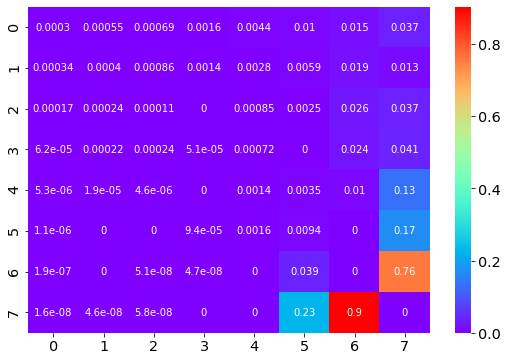

In [27]:
sns.heatmap(values,annot=values,cmap='rainbow')